In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import re
import nltk
from sklearn import metrics
from sklearn.metrics import *
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from keras.optimizers import *
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
import tensorflow as tf

In [3]:
tf.random.set_seed(2)

In [4]:
df = pd.read_excel('Dataset_Portability.xlsx')

In [5]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.529669,157.700481,18203.73003,8.926826,309.541977,498.650833,12.287824,52.028741,3.776041,1
1,8.065339,174.120584,21366.28360,7.490944,315.180405,497.019234,11.417019,46.213198,3.756392,1
2,9.158445,186.672973,15797.03040,8.151081,333.812264,425.752018,12.182639,112.622733,4.525237,1
3,8.848586,188.919983,32033.33202,13.127000,182.397370,479.791975,12.070444,77.671337,4.014682,1
4,9.495456,185.878594,18088.35485,7.527375,388.768657,409.450998,12.397704,63.359144,4.168541,1
...,...,...,...,...,...,...,...,...,...,...
692,4.370477,188.654037,29542.33817,8.117114,301.022182,456.308454,16.346838,46.696941,4.649382,0
693,10.316400,217.266842,10676.50848,3.445515,397.754946,492.206474,12.812732,72.281920,3.407349,0
694,6.599594,198.323261,21078.88717,6.234231,331.495637,447.987791,12.936304,59.833619,4.702311,0
695,4.197584,189.473677,31292.12770,7.105204,274.358159,370.771413,11.986402,50.322830,5.206480,0


In [6]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [8]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.529669,157.700481,18203.73003,8.926826,309.541977,498.650833,12.287824,52.028741,3.776041,1
1,8.065339,174.120584,21366.28360,7.490944,315.180405,497.019234,11.417019,46.213198,3.756392,1
2,9.158445,186.672973,15797.03040,8.151081,333.812264,425.752018,12.182639,112.622733,4.525237,1
3,8.848586,188.919983,32033.33202,13.127000,182.397370,479.791975,12.070444,77.671337,4.014682,1
4,9.495456,185.878594,18088.35485,7.527375,388.768657,409.450998,12.397704,63.359144,4.168541,1
...,...,...,...,...,...,...,...,...,...,...
692,4.370477,188.654037,29542.33817,8.117114,301.022182,456.308454,16.346838,46.696941,4.649382,0
693,10.316400,217.266842,10676.50848,3.445515,397.754946,492.206474,12.812732,72.281920,3.407349,0
694,6.599594,198.323261,21078.88717,6.234231,331.495637,447.987791,12.936304,59.833619,4.702311,0
695,4.197584,189.473677,31292.12770,7.105204,274.358159,370.771413,11.986402,50.322830,5.206480,0


In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:

df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.529669,157.700481,18203.73003,8.926826,309.541977,498.650833,12.287824,52.028741,3.776041,1
1,8.065339,174.120584,21366.28360,7.490944,315.180405,497.019234,11.417019,46.213198,3.756392,1
2,9.158445,186.672973,15797.03040,8.151081,333.812264,425.752018,12.182639,112.622733,4.525237,1
3,8.848586,188.919983,32033.33202,13.127000,182.397370,479.791975,12.070444,77.671337,4.014682,1
4,9.495456,185.878594,18088.35485,7.527375,388.768657,409.450998,12.397704,63.359144,4.168541,1


In [12]:
dftrain = df.drop(['Potability'],axis=1)

In [13]:
dftrain

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.529669,157.700481,18203.73003,8.926826,309.541977,498.650833,12.287824,52.028741,3.776041
1,8.065339,174.120584,21366.28360,7.490944,315.180405,497.019234,11.417019,46.213198,3.756392
2,9.158445,186.672973,15797.03040,8.151081,333.812264,425.752018,12.182639,112.622733,4.525237
3,8.848586,188.919983,32033.33202,13.127000,182.397370,479.791975,12.070444,77.671337,4.014682
4,9.495456,185.878594,18088.35485,7.527375,388.768657,409.450998,12.397704,63.359144,4.168541
...,...,...,...,...,...,...,...,...,...
692,4.370477,188.654037,29542.33817,8.117114,301.022182,456.308454,16.346838,46.696941,4.649382
693,10.316400,217.266842,10676.50848,3.445515,397.754946,492.206474,12.812732,72.281920,3.407349
694,6.599594,198.323261,21078.88717,6.234231,331.495637,447.987791,12.936304,59.833619,4.702311
695,4.197584,189.473677,31292.12770,7.105204,274.358159,370.771413,11.986402,50.322830,5.206480


In [14]:
dfresult = df['Potability']

In [15]:
dfresult

0      1
1      1
2      1
3      1
4      1
      ..
692    0
693    0
694    0
695    0
696    0
Name: Potability, Length: 697, dtype: int64

In [16]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.529669,157.700481,18203.73003,8.926826,309.541977,498.650833,12.287824,52.028741,3.776041,1
1,8.065339,174.120584,21366.28360,7.490944,315.180405,497.019234,11.417019,46.213198,3.756392,1
2,9.158445,186.672973,15797.03040,8.151081,333.812264,425.752018,12.182639,112.622733,4.525237,1
3,8.848586,188.919983,32033.33202,13.127000,182.397370,479.791975,12.070444,77.671337,4.014682,1
4,9.495456,185.878594,18088.35485,7.527375,388.768657,409.450998,12.397704,63.359144,4.168541,1
...,...,...,...,...,...,...,...,...,...,...
692,4.370477,188.654037,29542.33817,8.117114,301.022182,456.308454,16.346838,46.696941,4.649382,0
693,10.316400,217.266842,10676.50848,3.445515,397.754946,492.206474,12.812732,72.281920,3.407349,0
694,6.599594,198.323261,21078.88717,6.234231,331.495637,447.987791,12.936304,59.833619,4.702311,0
695,4.197584,189.473677,31292.12770,7.105204,274.358159,370.771413,11.986402,50.322830,5.206480,0


In [17]:
#min-max scalar
dfnorm=(dftrain-dftrain.min())/(dftrain.max()-dftrain.min())

In [18]:
x = dftrain.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dff = pd.DataFrame(x_scaled)

In [19]:
dff

,0,1,2,3,4,5,6,7,8
0,0.347715,0.399970,0.314487,0.666564,0.294184,0.551962,0.381966,0.230313,0.414255
1,0.328268,0.459529,0.378036,0.552575,0.305989,0.548246,0.334262,0.199770,0.410371
2,0.374050,0.505060,0.266127,0.604981,0.344999,0.385931,0.376203,0.548549,0.562363
3,0.361072,0.513210,0.592380,1.000000,0.027980,0.509010,0.370057,0.364986,0.461432
4,0.388165,0.502178,0.312169,0.555467,0.460061,0.348804,0.387985,0.289819,0.491848
...,...,...,...,...,...,...,...,...,...
692,0.173518,0.512246,0.542326,0.602284,0.276346,0.455525,0.604324,0.202310,0.586905
693,0.422548,0.616031,0.163235,0.231424,0.478876,0.537285,0.410721,0.336681,0.341369
694,0.266879,0.547318,0.372261,0.452809,0.340148,0.436574,0.417490,0.271303,0.597369
695,0.166277,0.515219,0.577486,0.521953,0.220519,0.260709,0.365453,0.221353,0.697037


In [20]:
dfnorm =(dftrain-dftrain.min())/(dftrain.max()-dftrain.min())

In [21]:
dfstd = (dftrain-dftrain.mean())/(dftrain.std())

In [22]:
dfstd

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.759333,-1.197966,-0.422632,0.939969,-0.377220,0.858062,-0.594009,-0.807166,-0.242288
1,0.503628,-0.715000,-0.075298,0.178052,-0.283616,0.837429,-0.860050,-1.137647,-0.266846
2,1.105598,-0.345795,-0.686953,0.528338,0.025692,-0.063810,-0.626144,2.636219,0.694055
3,0.934960,-0.279703,1.096234,3.168689,-2.487952,0.619574,-0.660421,0.650030,0.055965
4,1.291189,-0.369160,-0.435304,0.197384,0.938025,-0.269952,-0.560439,-0.163291,0.248258
...,...,...,...,...,...,...,...,...,...
692,-1.531121,-0.287525,0.822655,0.510314,-0.518657,0.322604,0.646067,-1.110157,0.849212
693,1.743280,0.554067,-1.249326,-1.968557,1.087207,0.776567,-0.433643,0.343765,-0.703078
694,-0.303553,-0.003123,-0.106862,-0.488792,-0.012766,0.217381,-0.395891,-0.363637,0.915362
695,-1.626333,-0.263417,1.014830,-0.026631,-0.961308,-0.759091,-0.686097,-0.904108,1.545472


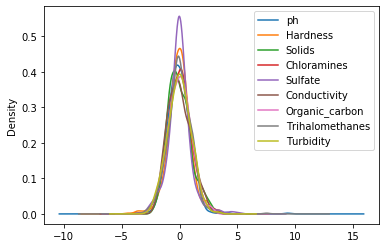

In [23]:
axstd = dfstd.plot.kde()

In [24]:
X_train,X_test, y_train, y_test = train_test_split(dfstd, dfresult, test_size=0.2, shuffle=False)

In [25]:
#Going manual

In [26]:
mean = np.mean(dfnorm)

In [27]:
std = np.std(dfnorm)

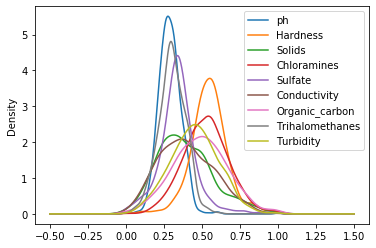

In [28]:
ax = dfnorm.plot.kde()

In [68]:
axx = ax.get_figure()

In [69]:
axx.savefig('Normalizatio.png', bbox_inches='tight')


In [70]:
axxstd=axstd.get_figure()

In [71]:
axxstd.savefig('std.png', bbox_inches='tight')

In [29]:
#tensorflow

In [30]:
dftrain.shape

(697, 9)

In [31]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.759333,-1.197966,-0.422632,0.939969,-0.377220,0.858062,-0.594009,-0.807166,-0.242288
1,0.503628,-0.715000,-0.075298,0.178052,-0.283616,0.837429,-0.860050,-1.137647,-0.266846
2,1.105598,-0.345795,-0.686953,0.528338,0.025692,-0.063810,-0.626144,2.636219,0.694055
3,0.934960,-0.279703,1.096234,3.168689,-2.487952,0.619574,-0.660421,0.650030,0.055965
4,1.291189,-0.369160,-0.435304,0.197384,0.938025,-0.269952,-0.560439,-0.163291,0.248258
...,...,...,...,...,...,...,...,...,...
552,-0.102752,0.421638,0.868217,0.275817,-0.182840,-0.666597,-0.337419,0.332802,0.025664
553,0.287518,-1.339802,0.102959,-0.490022,0.185506,-0.375041,0.006278,-0.110320,0.372846
554,-0.227882,0.637402,0.290258,0.646444,-0.053731,-0.587900,-2.286460,-3.299200,0.116566
555,-1.186588,-1.035489,-0.382375,0.506192,-0.598872,0.416604,0.815109,-0.277475,0.207270


In [32]:

# define model
model = Sequential()
model.add(Dense(32, activation='sigmoid',input_shape=(9,)))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


In [33]:
type(model)

keras.engine.sequential.Sequential

In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
# compile network
model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = opt,metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
type(model)

keras.engine.sequential.Sequential

In [36]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
552    1
553    1
554    1
555    1
556    1
Name: Potability, Length: 557, dtype: int64

In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=250)

In [38]:
abc = model.fit(X_train, y_train, epochs=150, verbose=1, callbacks=[callback], validation_data=(X_test,y_test))
#ran this 3 times

Epoch 1/150
18/18 [==============================] - 8s 424ms/step - loss: 0.2529 - accuracy: 0.5135 - val_loss: 0.2537 - val_accuracy: 0.4500
Epoch 2/150
18/18 [==============================] - 0s 5ms/step - loss: 0.2520 - accuracy: 0.5314 - val_loss: 0.2466 - val_accuracy: 0.5643
Epoch 3/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.5153 - val_loss: 0.2449 - val_accuracy: 0.6000
Epoch 4/150
18/18 [==============================] - 0s 7ms/step - loss: 0.2385 - accuracy: 0.5835 - val_loss: 0.2269 - val_accuracy: 0.6286
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2248 - accuracy: 0.6679 - val_loss: 0.2070 - val_accuracy: 0.6714
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2080 - accuracy: 0.6894 - val_loss: 0.1936 - val_accuracy: 0.7214
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2069 - accuracy: 0.7092 - val_loss: 0.1796 - val_accuracy: 0.7500
Epoch 8/150

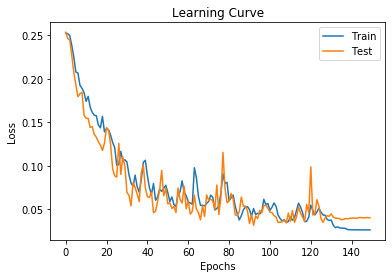

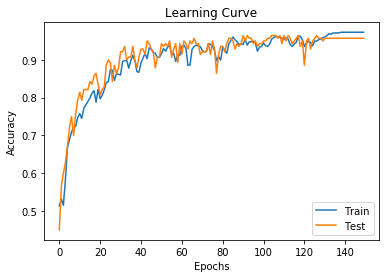

In [58]:
history=abc
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.legend()
plt.savefig('Loss.png', bbox_inches='tight')
plt.show()
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"],label="Train")
plt.plot(history.history["val_accuracy"],label="Test")
plt.legend()
plt.savefig('Accuracy.png', bbox_inches='tight')
plt.show()

In [39]:
pred = model.predict(X_test)

In [40]:
y_test

557    1
558    1
559    1
560    1
561    1
      ..
692    0
693    0
694    0
695    0
696    0
Name: Potability, Length: 140, dtype: int64

In [41]:
pred

array([[0.9759641 ],
       [0.00674751],
       [0.9662658 ],
       [0.97600377],
       [0.17346597],
       [0.9761762 ],
       [0.03518876],
       [0.96626514],
       [0.91108245],
       [0.9559533 ],
       [0.9659814 ],
       [0.01356542],
       [0.96626425],
       [0.9761361 ],
       [0.9761366 ],
       [0.96572983],
       [0.9620019 ],
       [0.9661208 ],
       [0.9631305 ],
       [0.966207  ],
       [0.9761829 ],
       [0.97229195],
       [0.9760673 ],
       [0.9762901 ],
       [0.97625244],
       [0.9747826 ],
       [0.97561127],
       [0.9757776 ],
       [0.9662658 ],
       [0.9662656 ],
       [0.97613704],
       [0.9763025 ],
       [0.976004  ],
       [0.9656137 ],
       [0.9725653 ],
       [0.96626586],
       [0.9628415 ],
       [0.9663355 ],
       [0.97169745],
       [0.97616297],
       [0.97616786],
       [0.9662658 ],
       [0.9655796 ],
       [0.96601164],
       [0.9659804 ],
       [0.97601473],
       [0.9662658 ],
       [0.975

In [42]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(pred)
]

In [62]:
y_test

pandas.core.series.Series

In [59]:
prediction_classes

[1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [43]:
print(accuracy_score(prediction_classes,y_test))

0.9571428571428572


In [44]:
print(accuracy_score(prediction_classes,y_test))

0.9571428571428572


([1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,

In [72]:
yy = y_test.tolist()

In [73]:
yy

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [80]:
len(prediction_classes)

140

In [77]:
print(prediction_classes,"=>",yy)

[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] => [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [84]:
print("Actual ==> Predicted")
for n,l in zip(yy,prediction_classes):
    print(n)

Actual ==> Predicted
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [47]:
clf = Perceptron()

In [48]:
clf.fit(X_train,y_train)

Perceptron()

In [49]:
y_pred = clf.predict(X_test)

In [50]:
print(accuracy_score(y_pred,y_test))

0.4857142857142857


In [51]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [52]:
predtrain = model.predict(X_train)

In [53]:
prediction_classes_train = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predtrain)
]

In [54]:
print(accuracy_score(prediction_classes_train,y_train))

0.9730700179533214


In [55]:
#Adam worked better than SGD
#Learning rate of 0.1 was better than 0.05 and 0.01
#Multiple Epoch runs for 150 x 3 times
#Std worked bettern than norm
#4 times works, 5th epoch ruins

In [56]:
#to be added
'''
1.loss graphs
2.Dropout
3.Early with accuracy, validation
4.Batch size changes, plot
5.Learning rate graph
6.
'''

'\n1.loss graphs\n2.Dropout\n3.Early with accuracy, validation\n4.Batch size changes, plot\n5.Learning rate graph\n6.\n'

In [65]:
import sklearn.metrics   
mse = sklearn.metrics.mean_squared_error(y_test, prediction_classes)  
  
rmse = np.sqrt(mse)  
  
print("The root mean square error between actual and predicted values is ==> ", rmse)

The root mean square error between actual and predicted values is ==>  0.20701966780270625
